In [141]:
from sklearn.datasets import load_wine

data = load_wine()['data']
target = load_wine()['target']

# Parameters use in different classifier methods
my_random_state = 1
max_depth = 1
learning_rate = 1
subsample = 0.5
leafs = 3
estimators = 95

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

dt_clf = DecisionTreeClassifier(min_samples_leaf=leafs, random_state=my_random_state)
dt_clf_temp = DecisionTreeClassifier(min_samples_leaf=leafs, max_depth=max_depth, random_state=my_random_state)
b_clf = BaggingClassifier(dt_clf, n_estimators=estimators , random_state=my_random_state)
ab_clf = AdaBoostClassifier(dt_clf_temp, n_estimators=estimators , random_state=my_random_state, algorithm='SAMME')
gb_clf = GradientBoostingClassifier(init=dt_clf_temp, n_estimators=estimators , learning_rate=learning_rate, subsample=subsample)

In [143]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

sk = StratifiedKFold(n_splits=5, shuffle=True, random_state=my_random_state)
dtc_val = cross_val_score(dt_clf, data, target, cv=sk)
b_val = cross_val_score(b_clf, data, target, cv=sk)
ab_val = cross_val_score(ab_clf, data, target, cv=sk)
gbc_val = cross_val_score(gb_clf, data, target, cv=sk)

In [144]:
print(f"DecisionTreeClassifier {dtc_val}, avg: ({dtc_val.mean()})")
print(f"BaggingClassifier {b_val }, avg: ({b_val .mean()})")
print(f"AdaBoostClassifier {ab_val}, avg: ({ab_val.mean()})")
print(f"GradientBoostingClassifier {gbc_val}, avg: ({gbc_val.mean()})")

DecisionTreeClassifier [0.86111111 0.88888889 0.88888889 0.94285714 0.94285714], avg: (0.9049206349206349)
BaggingClassifier [0.97222222 0.97222222 0.91666667 0.97142857 1.        ], avg: (0.9665079365079364)
AdaBoostClassifier [0.97222222 0.91666667 0.91666667 0.97142857 1.        ], avg: (0.9553968253968254)
GradientBoostingClassifier [0.97222222 0.91666667 0.91666667 0.94285714 1.        ], avg: (0.9496825396825397)


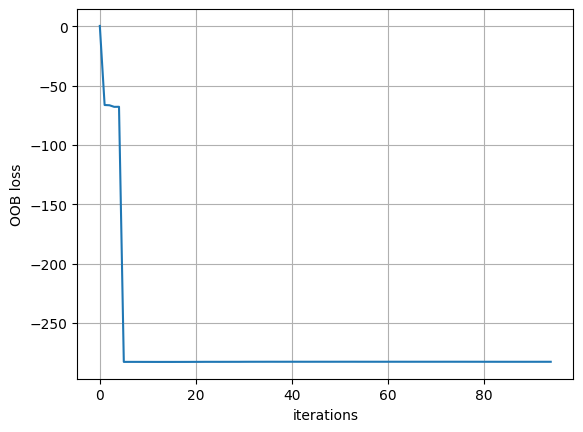

In [145]:
import numpy as np
import matplotlib.pyplot as plt

gbc = GradientBoostingClassifier(init=dt_clf_temp, n_estimators=estimators, learning_rate=1, subsample=0.5, random_state=my_random_state)

gbc.fit(data, target)
oob_cumulated = np.cumsum(gbc.oob_improvement_)
plt.plot(oob_cumulated)
plt.xlabel("iterations")
plt.ylabel("OOB loss")
plt.grid()
plt.show()